Emil Kirkegaard made somewhat of a *name* for himself when he in May 2016 published a dataset holding 68 371 Okcupid profiles scraped for 2620 variables. The critique was all around academia and Twitter – and mainly regarding:

  * That the dataset was scraped without permission from Okcupid or the users.
  * Included usernames, and sexual orientation – making people easy to identify.
  * Trying to show that atheists and white people had higher cognitive abilities than religious people.
  * Having a website stating that underperforming immigrants should be sent home.
  
This somewhat overshadowed that he actually had made his data open for anyone to use. This is more than most scientists. Even with inhumane ideas and perhaps flawed methods, this opens for anyone to prove him wrong.

It also held back the fact that the data had some extremely interesting stuff in it. Insights far more interesting than trying to claim religion or race have anything to do with intelligence. Insights about peoples sexual habits. So let's get to work! Notebook and masked data can be found [here](url) if you want to follow along. 

In [3]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
import pandas as pd
import numpy as np
import seaborn as sns
from textwrap import wrap
import matplotlib.pyplot as plt
from IPython.display import display

pd.set_option('display.max_columns', 500)
sns.set_style("darkgrid", {
    "axes.facecolor": ".93", 
    'font.family': [u'monospace'],
    'font.sans-serif': [u'Courier']})
sns.set_palette(sns.color_palette("Paired", 20))

Let's load up the data. (Note how nice it is to have it stored as a 75 MB bzipped file unpacking on the fly instead of 1 GB on disk.)

In [61]:
df = pd.read_csv(
    'data/user_data_public_masked.csv.bz2', compression='bz2', low_memory=False)

The data only holds the questions as columns and what answer users responded. So let's load up the questions also

In [52]:
questions = pd.read_csv('data/question_data.csv', sep=";").rename(columns={'Unnamed: 0': 'question'})
questions[questions['N'] > 5000].sample(5)

,question,text,option_1,option_2,option_3,option_4,N,Type,Order,Keywords
1732,q46740,If it were possible to change your gender inst...,Yes.,No.,NaN,NaN,11844,O,NaN,preference
2479,q86773,When a date is coming to your house do you str...,Yes.,No.,NaN,NaN,14227,O,NaN,descriptive
110,q157,Do you have your own web page?,Yes,No,NaN,NaN,8471,O,NaN,descriptive
862,q18708,"Which of the following best describes Science,...","A belief system, no better or worse than Relig...",A method one can follow to make predictions.,A post-hoc explanation of God's miracles.,"Hello? Like totally boring, dude.",21632,N,NaN,religion/superstition
2400,q85115,Suppose someone has engaged in numerous sexual...,Yes.,No.,NaN,NaN,6771,O,NaN,opinion


Now we have another dataframe with the questions in clear text.

Here's a function taking two questions and with the Pandas function `crosstab` count the coocurances between the answers to find juicy insights. It also allows for one or any question to not be specified which instead makes it pick a question at random. If no questions is specified, it takes one question regarding sex and another one at random to spice things up at bit. Finally it uses the Seaborn function `heatmap` to visualize it. 

In [6]:
import textwrap

def crosstab(left=None, right=None, show_table=False):
    """ This just pimps the excellent crosstab fuction in Pandas and makes 
        it into percentages. If no question is selected. Pick at random. """
    
    if not isinstance(left, pd.Series):
        q1 = (
            questions[
                (questions['Keywords'].str.match("sex").fillna(False)) &
                (questions['N'] > 2000)
            ].sample(1)
        )['question'].values[0]
        left = df[q1]
    else:
        q1 = left.name
        
    if not isinstance(right, pd.Series):    
        q2 = (
            questions[
                (questions['N'] > 2000)
            ].sample(1)
        )['question'].values[0]
        right = df[q2]
    else:
        q2 = right.name
    
    left = left.copy(deep=True)
    right = right.copy(deep=True)
    left_q = questions[questions['question'] == left.name].text.values[0]
    right_q = questions[questions['question'] == right.name].text.values[0]
    
    left.name = textwrap.fill(q1 + ": " + left_q, 30)
    right.name = textwrap.fill(q2 + ": " + right_q, 20)
    
    tmp = pd.crosstab([left], right)
    if show_table:
        display(tmp)
    
    tmp = tmp.div(tmp.sum(axis=1).astype(float), axis=0)
    tmp = pd.crosstab([left], right).T
    tmp = tmp.div(tmp.sum(axis=1).astype(float), axis=0)
    
    fig, ax = plt.subplots(1, figsize=(3, 3))
    ax = sns.heatmap(
        tmp, 
        annot=True, 
        fmt="0.0%", 
        linewidths=.5, 
        cmap="Greens", 
        cbar=False,
        ax=ax
    )
    labels = [item.get_text() for item in ax.get_xticklabels()]
    ax.set_xticklabels(labels, rotation=30, ha='right')
    ax.set_ylabel(ax.get_ylabel(), rotation=0, ha='right')
    plt.show()

# Being slapped in the face (during sex)

**`How does the idea of being slapped hard in the face during sex make you feel?`** is the first question that popped up for me. And we are just getting started. We can now see how that question groupes with people saying yes to **`Would you consider having sex in a graveyard?`**. Nice!

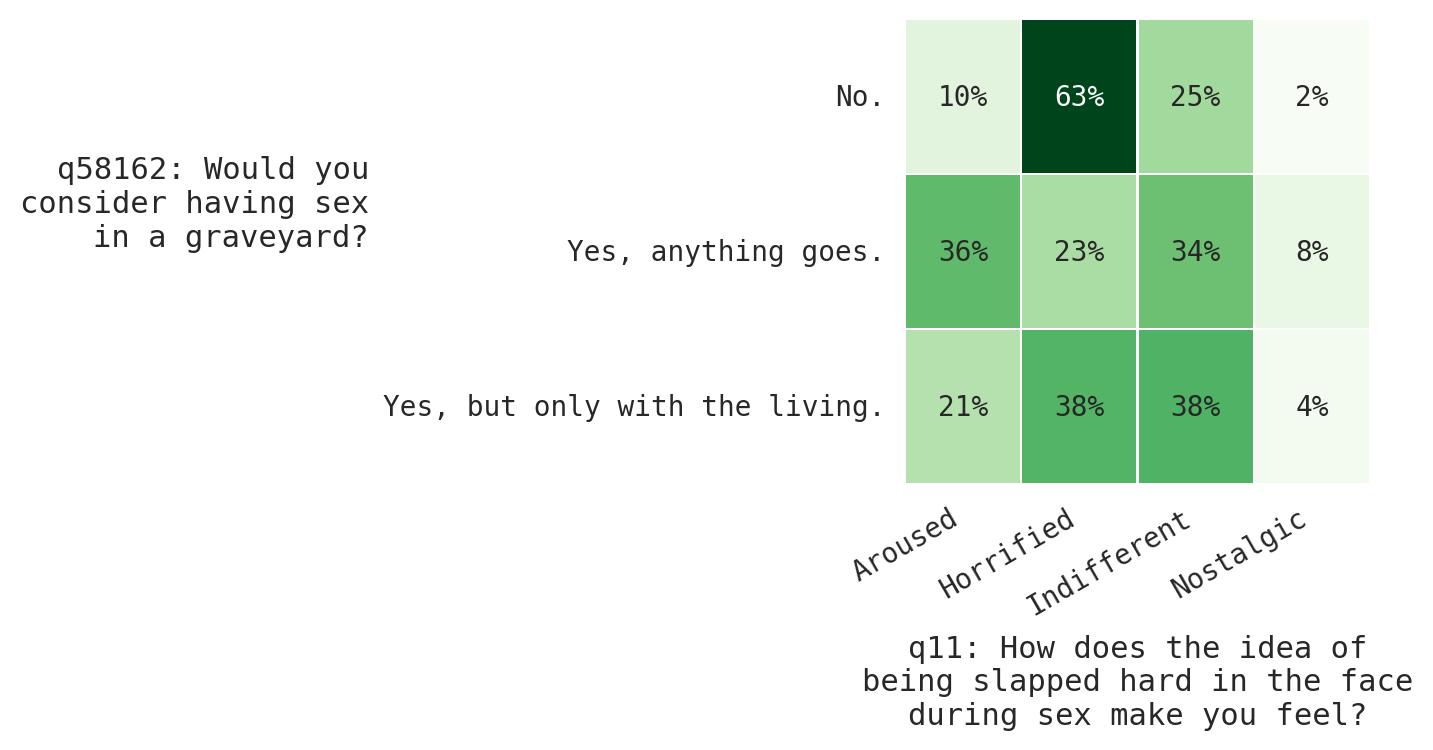

In [7]:
crosstab(df.q11, df.q58162)

So if you like the idea of being slapped in the face during sex, you have a higher probability of saying `Yes, anything goes` to having sex in a graveyard. And note that there also was a another option saying `Yes, but only with the living`. Ok.

# Quantum physics and groupsex

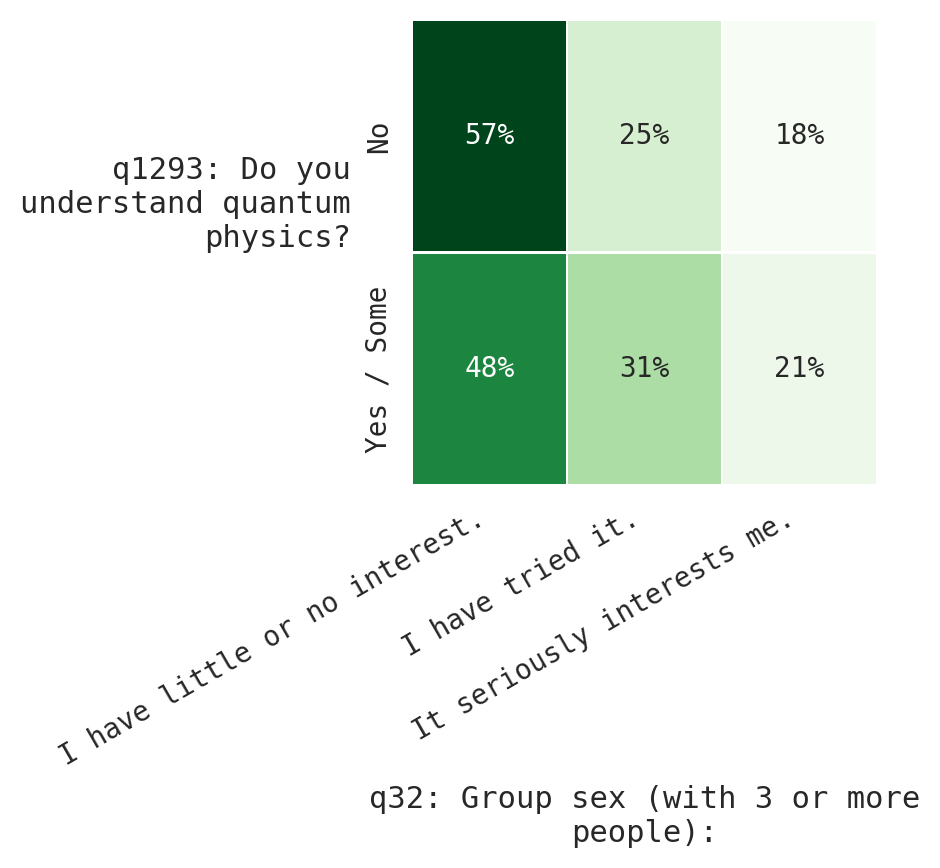

In [8]:
crosstab(left=df.q32, right=df.q1293)

Right, so understading of quantum physics gives you higher probability to be interested in group sex. Makes sense. Let's not make stuff boring by starting to talk about correlation and causation.

# Drugs and parting from a relationship

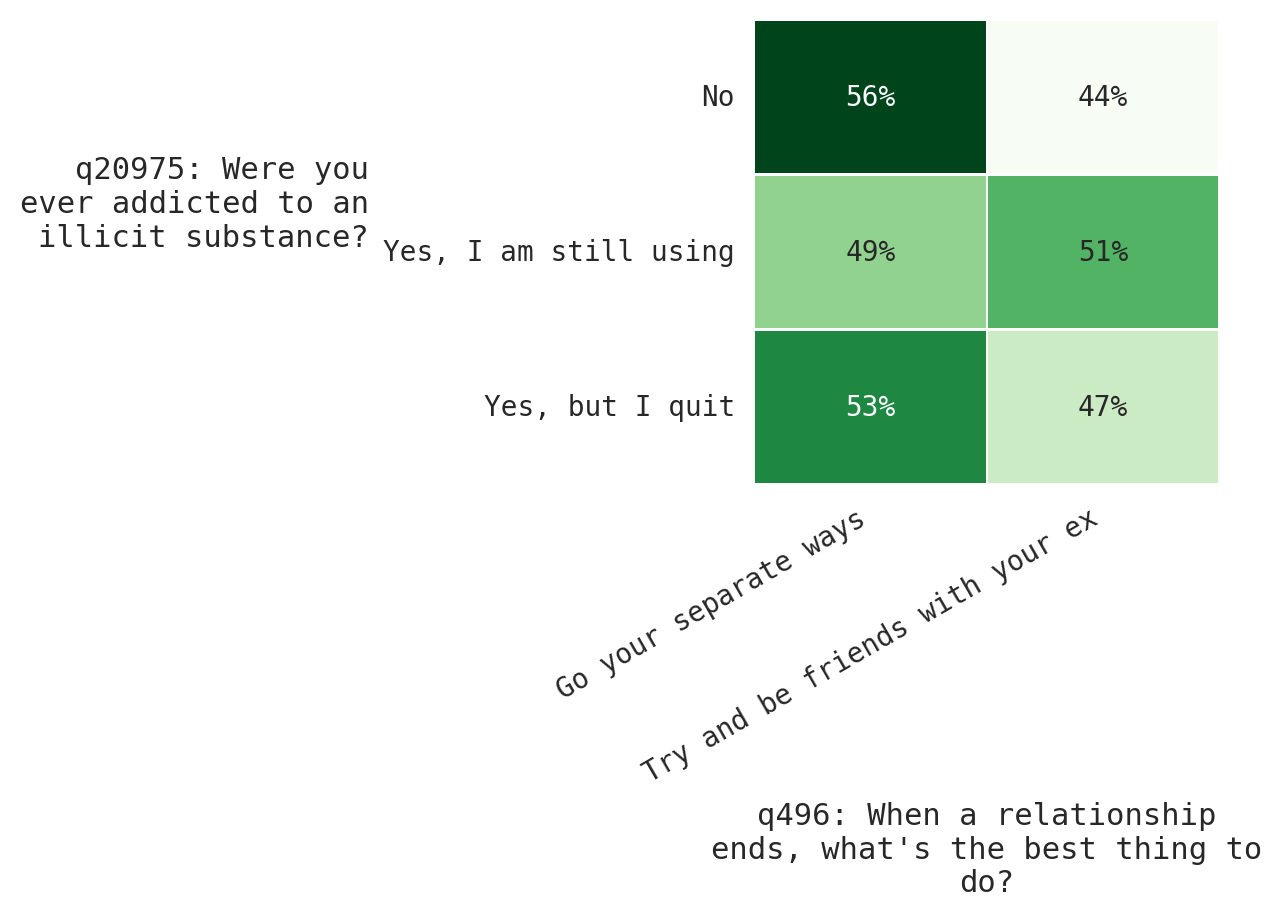

In [9]:
crosstab(right=df.q20975, left=df.q496)

Drugusers more likely to be friends with their exes? Yeah, people who use drugs are cooler obviously.

# Nationalism and how to improve the world

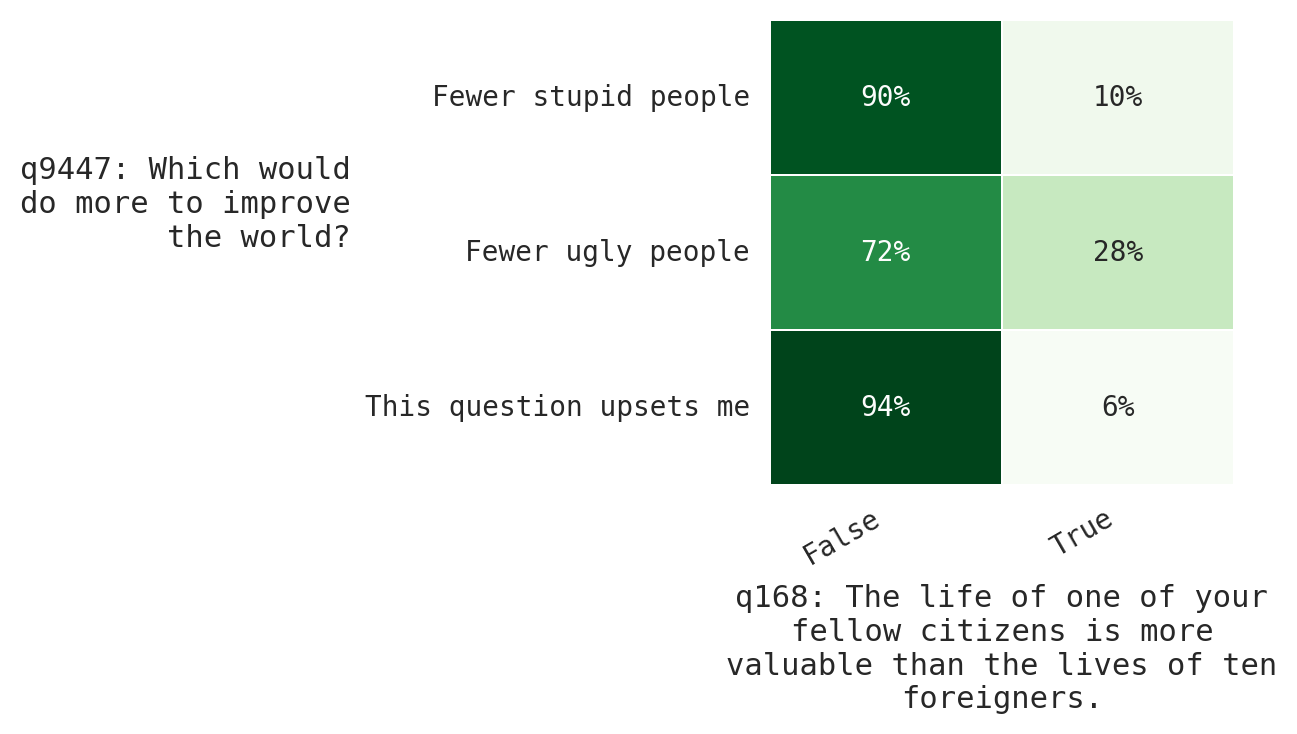

In [10]:
crosstab(left=df.q168, right=df.q9447)

To holding your fellow citizens higher than the rest of the world groups with the ones thinking fewer ugly people would make the world a better place. 

# Face slappers not loving other cultures

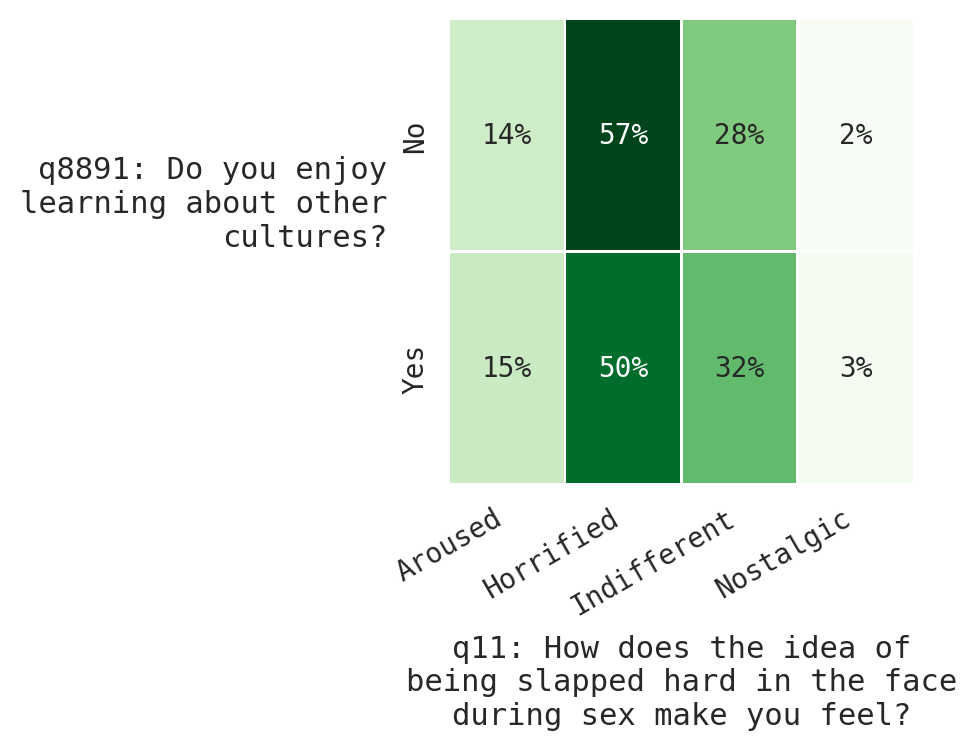

In [11]:
crosstab(df.q11, df.q8891)

Not being interested in other cultures makes you more likely to not like being slapped in the face. Who would have known.

# Face slappers not loving conserts

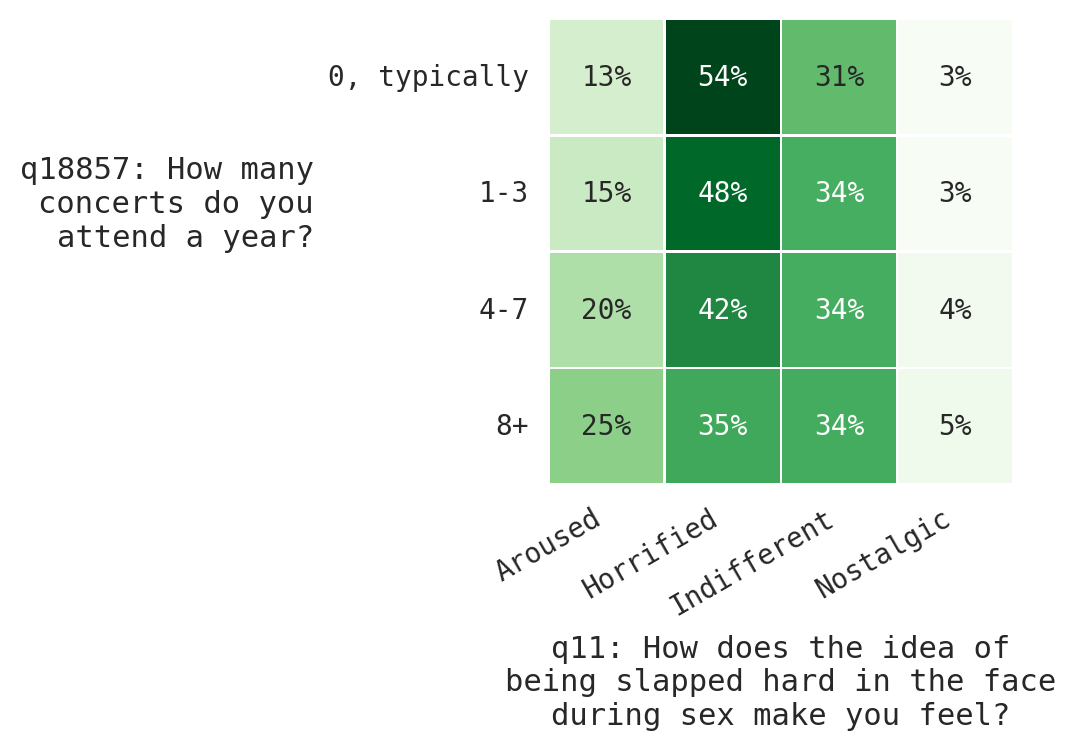

In [12]:
crosstab(df.q11, df.q18857)

Ok the slapped in the face thing might be enough now.

# Bullied masturbators

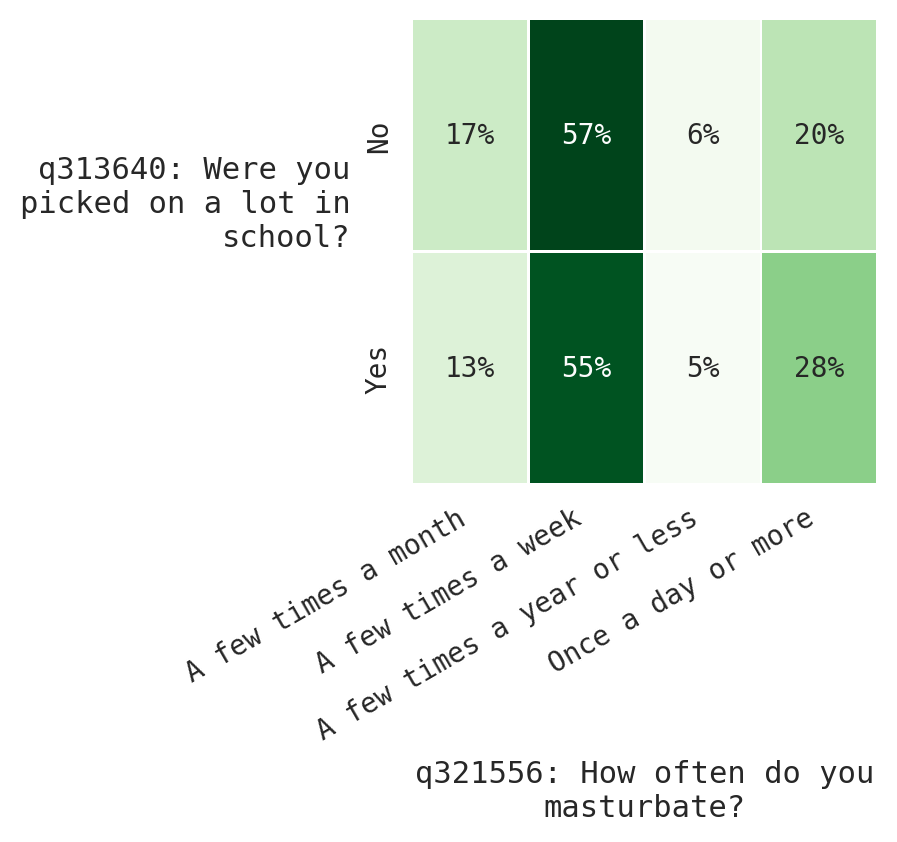

In [13]:
crosstab(df.q321556, df.q313640)

Heavily masturbaters are more likely to have been picked on in school. How's masturbation relating to religion by the way?

# Religion and masturbation

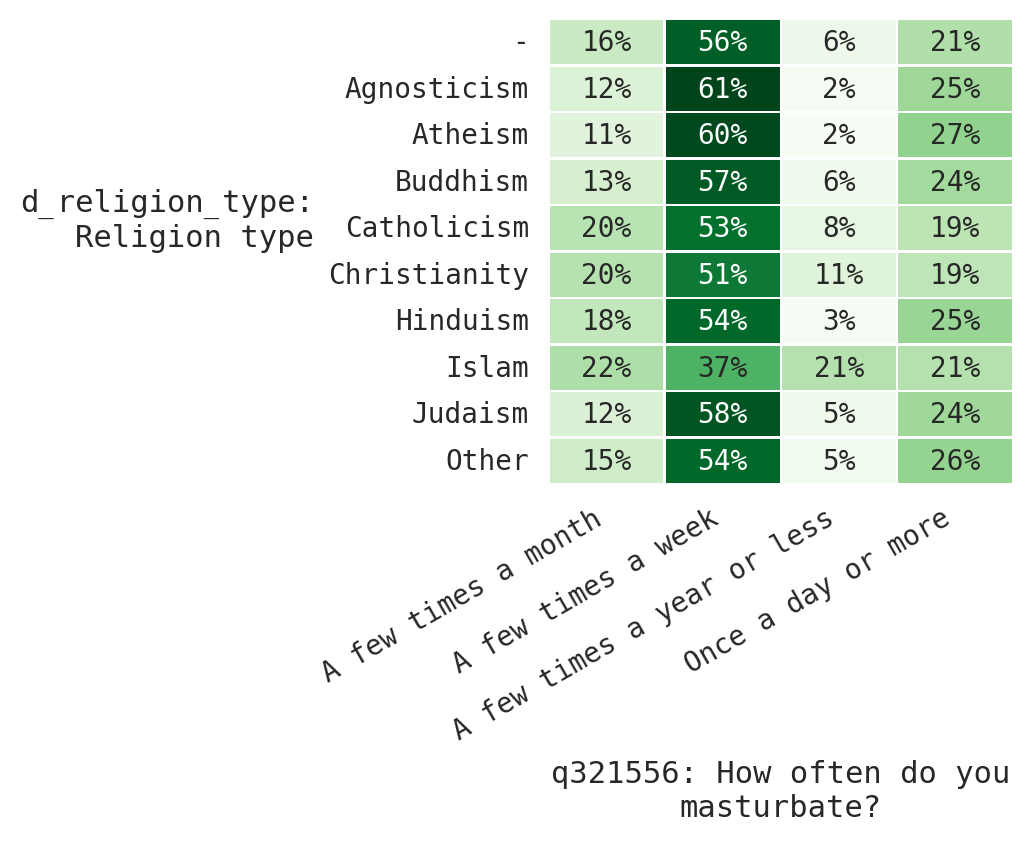

In [14]:
crosstab(df.q321556, df.d_religion_type)

You filthy filthy atheists!

# See your date naked before the date?

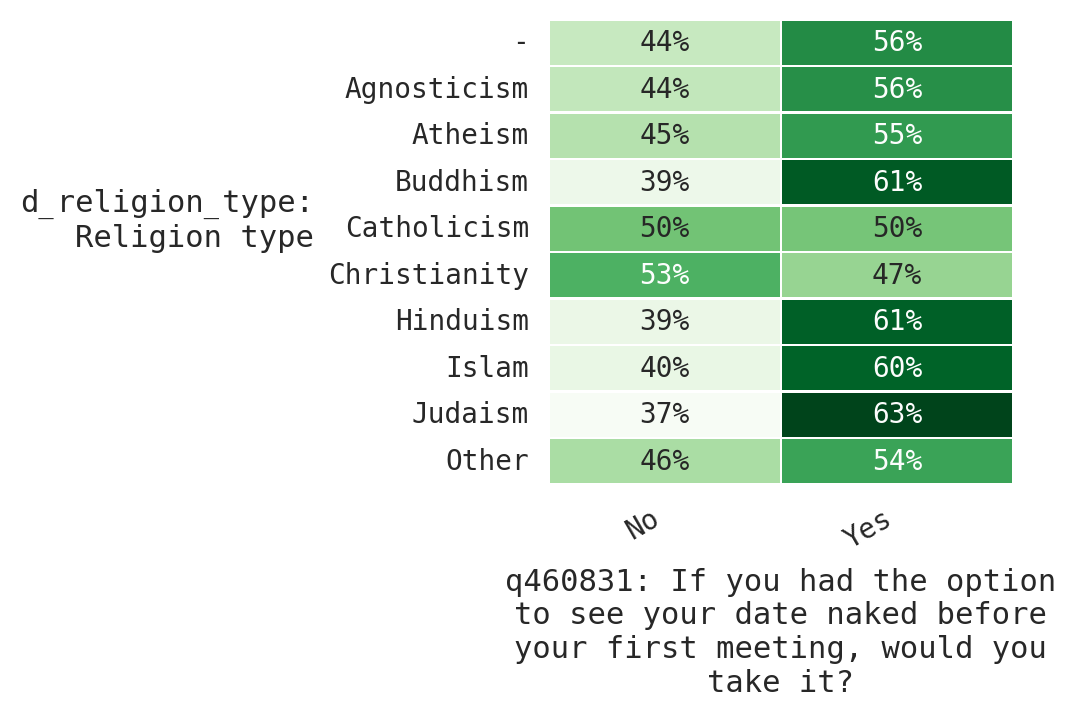

In [15]:
crosstab(df.q460831, df.d_religion_type)

# Education and smoking

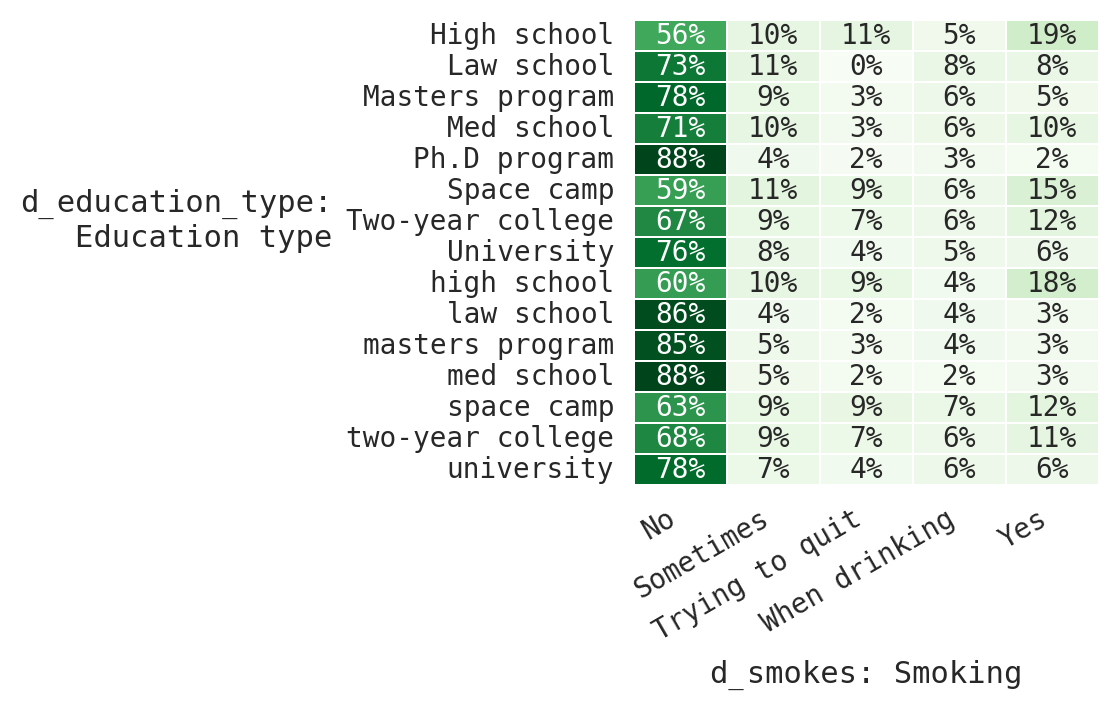

In [17]:
crosstab(df.d_smokes, df.d_education_type)

I don't think space camp's a real thing. But if it is, it sounds cool and I would want to attend to smoke with the cool kids.

So here my patience in finiding "insights" stops but do please download the repo and run `crosstab()` to pick something that might be of intrest.

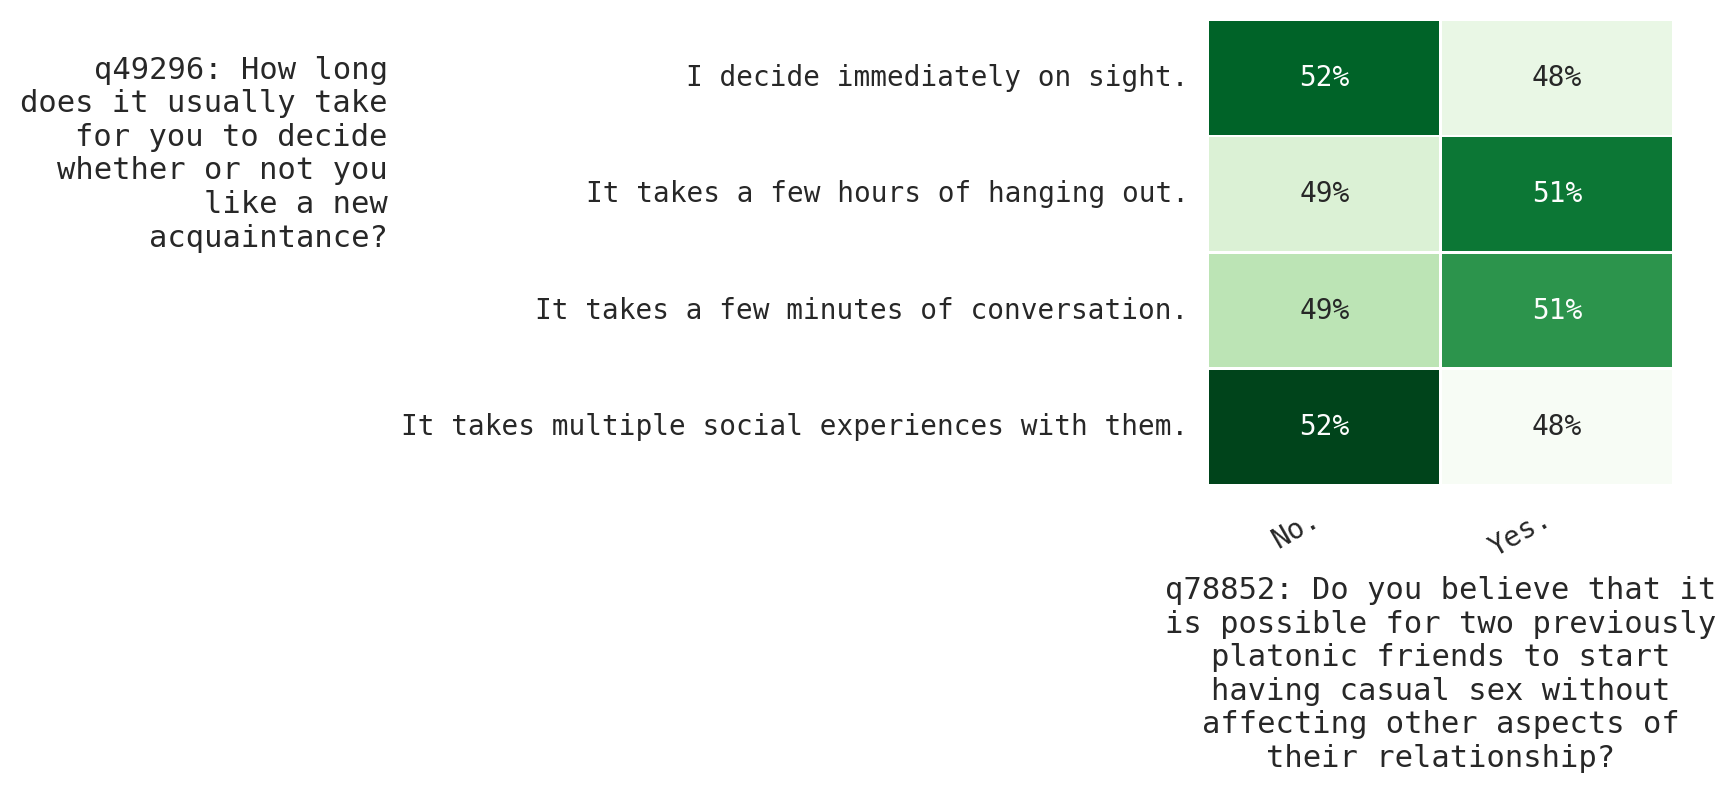

In [26]:
crosstab()

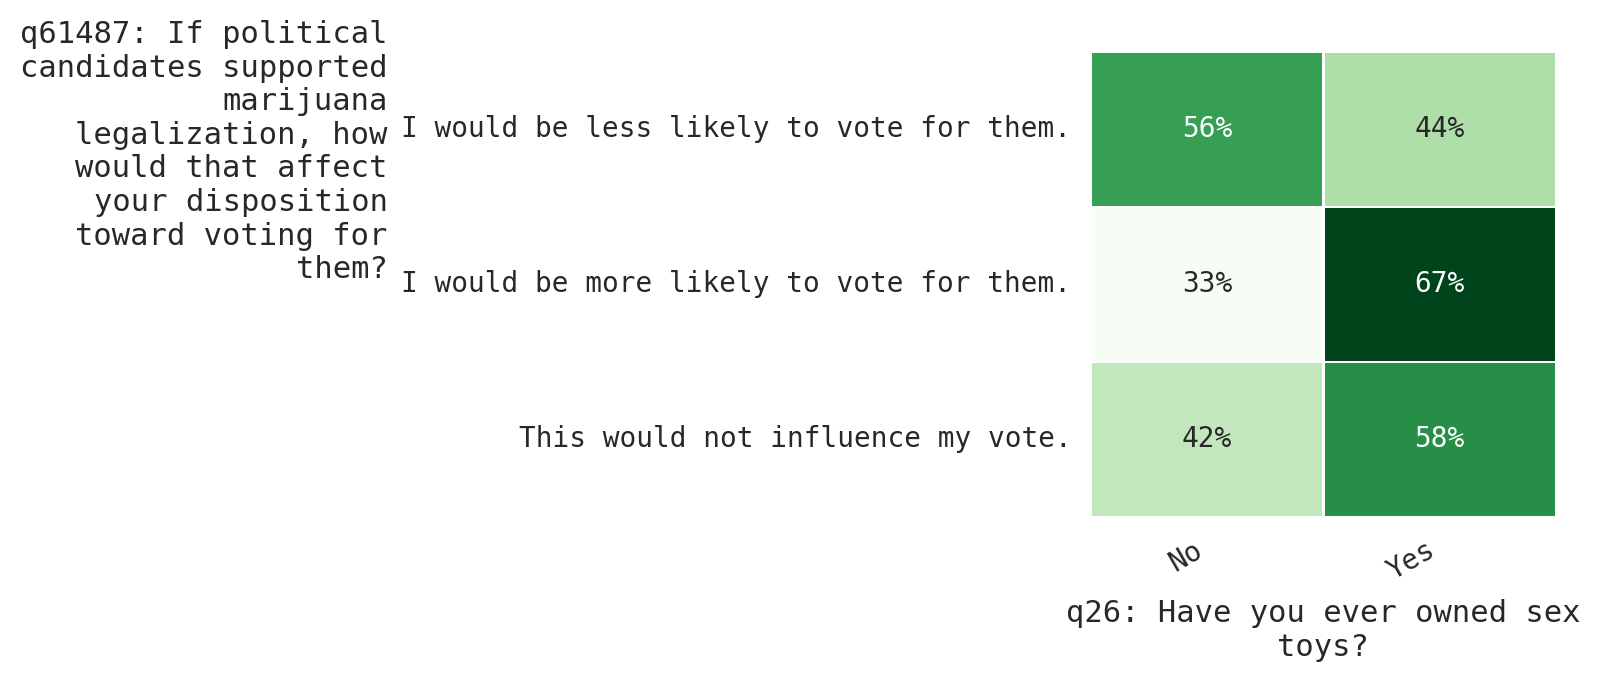

In [33]:
crosstab()

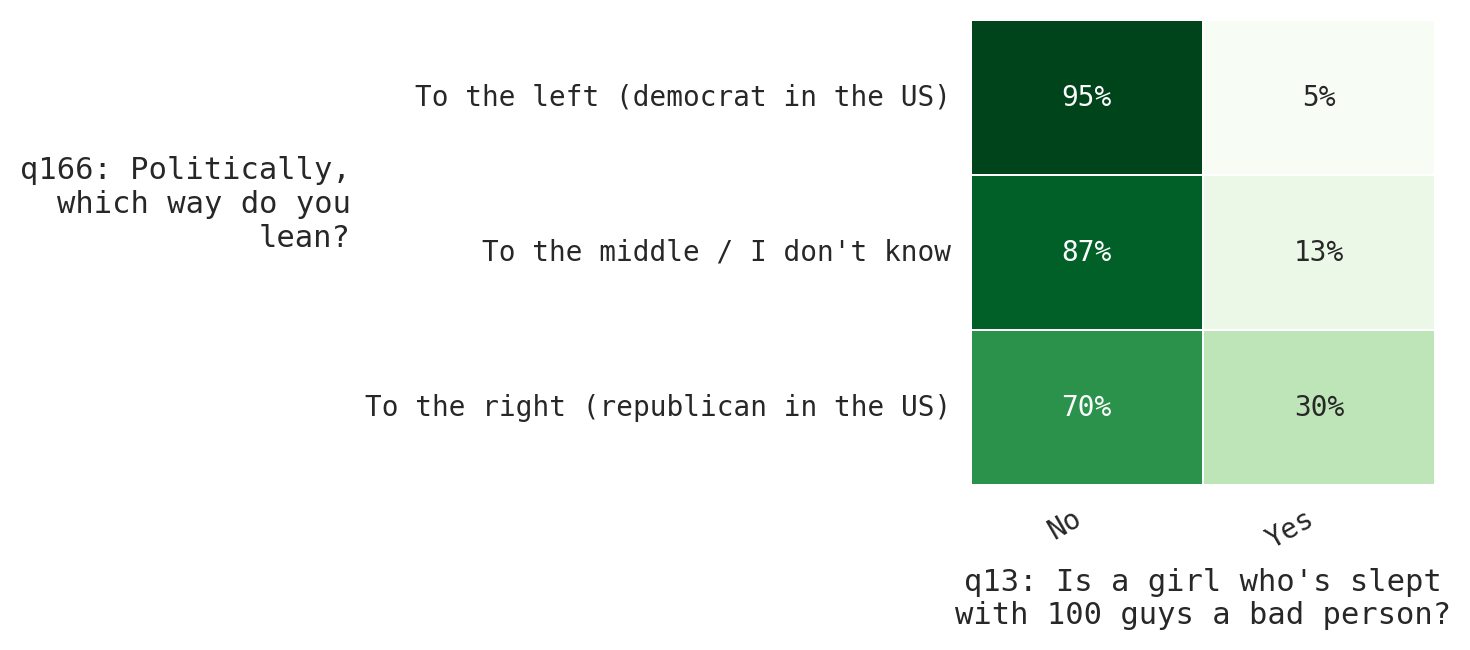

In [40]:
crosstab(right=df.q166, left=df.q13)